In [ ]:
 import numpy as np
 import matplotlib.pyplot as plt
 %matplotlib inline
 import string
 import math

In [ ]:
observations_fl='/content/observations.txt'
initialdist_fl='/content/initialStateDistribution.txt'
emission_mat_fl='/content/emissionMatrix.txt'
transition_mat_fl='/content/transitionMatrix.txt'

In [ ]:
observations=np.loadtxt(observations_fl, dtype='int')
initialdist=np.loadtxt(initialdist_fl)
emission_mat=np.loadtxt(emission_mat_fl)
transition_mat=np.loadtxt(transition_mat_fl)

In [ ]:
observations = observations.astype(int)

In [ ]:
print(initialdist.shape)
print(observations.shape)
print(transition_mat.shape)
print(emission_mat.shape)

(27,)
(430000,)
(27, 27)
(27, 2)


In [ ]:
len(observations)

430000

In [ ]:
n=27 #no.of hidden states
m=2
T=430000

In [ ]:
l=np.empty([n,T])
print(l.shape)

(27, 430000)


In [ ]:
alphaDict=dict(zip(range(1,28), string.ascii_lowercase+' '))

In [ ]:
l[:,0] = np.log(initialdist) + np.log(emission_mat[:, observations[0]])


In [ ]:
phi = np.empty([n,T])
phi[:,0] = initialdist
print(phi.shape)

(27, 430000)


In [ ]:
s = np.full(T, -1, dtype=int)

In [ ]:
def update_mat(r,c):
  '''This function computes computes l*_(j,t+1), phi_(j,t+1)'''
  state_transitions = l[:,c-1] + np.log(transition_mat[:, r])
  most_prob = int(np.argmax(state_transitions))
  new_lne=np.amax(state_transitions) + np.log(emission_mat[r, observations[c]])
  return most_prob, new_lne


In [ ]:
def Backtracking(t_idx):
    if t_idx == T-1:
        return int(np.argmax(l[:,T-1]))
    else:
        return phi[s[t_idx+1], t_idx+1]

In [ ]:
def run_viterbi():
  for t in range(T-1):
    for j in range(n):
      phi[j,t+1], l[j,t+1]=update_mat(j, t+1)
  for t in range(T-1, -1, -1):
    s[t]=int(Backtracking(t))

In [ ]:
def plot_hmm():
  plt.plot(s)
  plt.title('HIdden state vs time')
  plt.xlabel('time')
  plt.ylabel('Hidden states')

In [ ]:
def decode_msg():
  msg=[]
  for t in range(T-1):
    if s[t]!=s[t+1]:
      msg.append(alphaDict.get(s[t]+1))
    msg.append(alphaDict.get(s[T-1]+1))
  return ''.join(msg)



In [ ]:
run_viterbi()

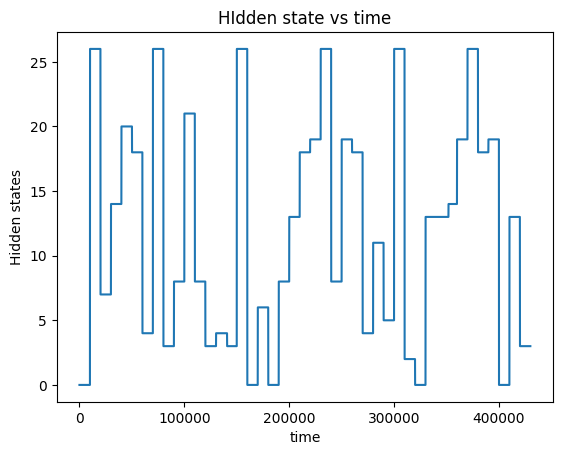

In [ ]:
plot_hmm()

In [ ]:
def decode():
  message = []
  for t in range(T-1):
    if s[t] != s[t+1]:
      message.append(alphaDict.get(s[t]+1))
  message.append(alphaDict.get(s[T-1]+1))
  return ''.join(message)


In [ ]:
hidden_message = decode()
print(hidden_message)


a house divided against itself canot stand
